# MNIST Classifier with Regularization and Learning Rate Scheduler

- **Dropout**
- **L2 Regularization**
- **Learning Rate Scheduler**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split off validation data
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_train, y_train = x_train[:-10000], y_train[:-10000]


In [3]:
model_original = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_original.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_original = model_original.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=15,
    verbose=2
)


/Users/tanishjain/py311env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1563/1563 - 2s - 2ms/step - accuracy: 0.9177 - loss: 0.2878 - val_accuracy: 0.9537 - val_loss: 0.1615
Epoch 2/15
1563/1563 - 2s - 1ms/step - accuracy: 0.9614 - loss: 0.1299 - val_accuracy: 0.9634 - val_loss: 0.1234
Epoch 3/15
1563/1563 - 2s - 1ms/step - accuracy: 0.9736 - loss: 0.0886 - val_accuracy: 0.9715 - val_loss: 0.0979
Epoch 4/15
1563/1563 - 2s - 1ms/step - accuracy: 0.9800 - loss: 0.0655 - val_accuracy: 0.9741 - val_loss: 0.0925
Epoch 5/15
1563/1563 - 2s - 1ms/step - accuracy: 0.9841 - loss: 0.0508 - val_accuracy: 0.9739 - val_loss: 0.0885
Epoch 6/15
1563/1563 - 2s - 1ms/step - accuracy: 0.9877 - loss: 0.0399 - val_accuracy: 0.9756 - val_loss: 0.0863
Epoch 7/15
1563/1563 - 2s - 1ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9750 - val_loss: 0.0913
Epoch 8/15
1563/1563 - 2s - 1ms/step - accuracy: 0.9927 - loss: 0.0249 - val_accuracy: 0.9759 - val_loss: 0.0867
Epoch 9/15
1563/1563 - 2s - 1ms/step - accuracy: 0.9942 - loss: 0.0203 - val_accuracy: 0.9738 - 

In [4]:
initial_lr = 0.01

model_reg = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: initial_lr * 0.5**(epoch // 5))

model_reg.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_reg = model_reg.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=15,
    callbacks=[lr_scheduler],
    verbose=2
)


Epoch 1/15
1563/1563 - 4s - 3ms/step - accuracy: 0.7327 - loss: 1.3450 - val_accuracy: 0.8898 - val_loss: 0.8484 - learning_rate: 0.0100
Epoch 2/15
1563/1563 - 5s - 3ms/step - accuracy: 0.7184 - loss: 1.3154 - val_accuracy: 0.8793 - val_loss: 0.8334 - learning_rate: 0.0100
Epoch 3/15
1563/1563 - 4s - 2ms/step - accuracy: 0.7137 - loss: 1.2759 - val_accuracy: 0.8556 - val_loss: 0.8844 - learning_rate: 0.0100
Epoch 4/15
1563/1563 - 3s - 2ms/step - accuracy: 0.6942 - loss: 1.3011 - val_accuracy: 0.8083 - val_loss: 0.8977 - learning_rate: 0.0100
Epoch 5/15
1563/1563 - 4s - 2ms/step - accuracy: 0.6601 - loss: 1.3130 - val_accuracy: 0.8662 - val_loss: 0.8184 - learning_rate: 0.0100
Epoch 6/15
1563/1563 - 4s - 2ms/step - accuracy: 0.7241 - loss: 1.0601 - val_accuracy: 0.8909 - val_loss: 0.5863 - learning_rate: 0.0050
Epoch 7/15
1563/1563 - 4s - 2ms/step - accuracy: 0.7427 - loss: 0.9966 - val_accuracy: 0.9072 - val_loss: 0.5446 - learning_rate: 0.0050
Epoch 8/15
1563/1563 - 3s - 2ms/step - ac

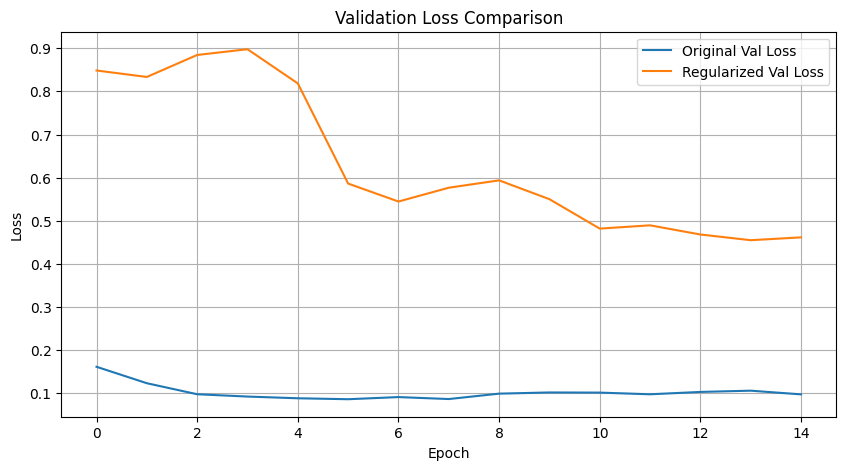

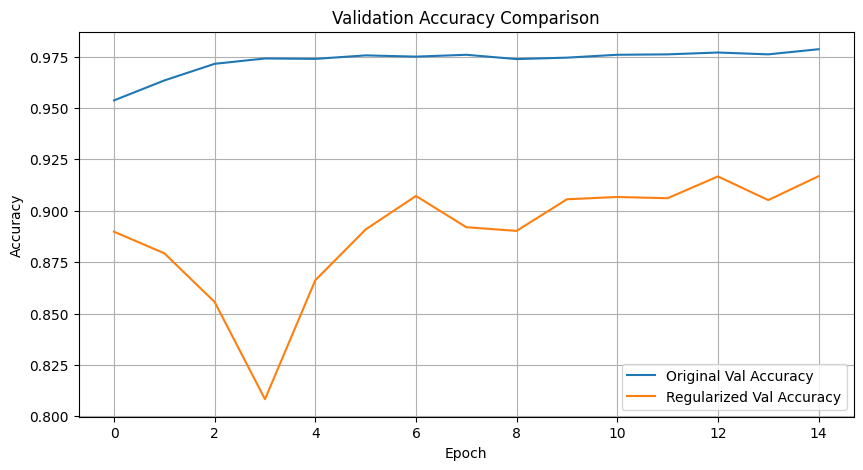

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(history_original.history['val_loss'], label='Original Val Loss')
plt.plot(history_reg.history['val_loss'], label='Regularized Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_original.history['val_accuracy'], label='Original Val Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Regularized Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()


###

| Technique                  | Effect                           |
|---------------------------|----------------------------------|
| Dropout                   | Reduces overfitting              |
| L2 Regularization         | Penalizes large weights          |
| Learning Rate Scheduler   | Smooths convergence              |
| Overall                   | Better validation performance    |
